# 5 Social network analysis


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## 5.1 Basic concepts of network

- A __network__ is frequently used interchangeably with a __graph__, but it typically highlights real-world applications and is commonly associated with social relationships (social networks), and built environments  (road networks).

- A __graph__ ($G$) is a mathematical structure used to model pairwise relations between objects. It consists of a set of __vertices (nodes)__ and a set of __edges (links)__ that connect pairs of vertices.


__Graph Type__


| Graph Type               | Description                                                  | NetworkX Class   |
|--------------------------|--------------------------------------------------------------|------------------|
| Undirected Graph         | A graph where edges have no direction.                       | __Graph__        |
| Directed Graph           | A graph where edges have a direction, indicated by an arrow. | __DiGraph__      |
| Multi-(undirected) Graph | An undirected graph with parallel edges.                     | __MultiGraph__   |
| Multi-directed Graph     | A directed graph with  parallel edges.                       | __MultiDiGraph__ |

Note: All types of graphs can have self-loops.

## 5.2  Measurements for nodes and edges

In [164]:
# Create an empty undirected graph
G = nx.Graph()

In [165]:
# Add edge with weight
G.add_edge(1, 2, weight=30)
G.add_edge(1, 3, weight=5)
G.add_edge(2, 3, weight=22)
G.add_edge(2, 4, weight=2)
G.add_edge(3, 4, weight=37)

In [166]:
# Print edge infos
print(G.edges(data=True))

[(1, 2, {'weight': 30}), (1, 3, {'weight': 5}), (2, 3, {'weight': 22}), (2, 4, {'weight': 2}), (3, 4, {'weight': 37})]


In [167]:
# Print node infos, the {} represents the node attributes for each node, e.g, you can input {'attribute_name': 'value'}
print(G.nodes(data=True))

[(1, {}), (2, {}), (3, {}), (4, {})]


In [168]:
# Add node with attributes
G.add_node(1, name='A')
G.add_node(2, name='B')
G.add_node(3, name='C')
G.add_node(4, name='D')

In [169]:
# Print node infos
print(G.nodes(data=True))

[(1, {'name': 'A'}), (2, {'name': 'B'}), (3, {'name': 'C'}), (4, {'name': 'D'})]


In [170]:
# Print weight info
weights = nx.get_edge_attributes(G, 'weight')
weights

{(1, 2): 30, (1, 3): 5, (2, 3): 22, (2, 4): 2, (3, 4): 37}

{(1, 2): Text(0.5532658439544372, 0.7746875514598375, '30'),
 (1, 3): Text(0.26527960443106796, 0.553355212105517, '5'),
 (2, 3): Text(0.44400741321753107, 0.3773273824606946, '22'),
 (2, 4): Text(0.39503984440515744, 0.7324168859908449, '2'),
 (3, 4): Text(0.10705093762945314, 0.5110867082546724, '37')}

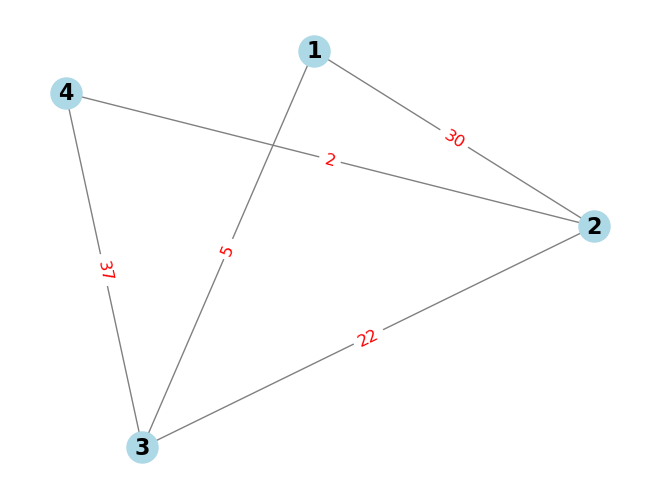

In [171]:
#Plot the graph
pos = nx.random_layout(G, seed=42) # Random layout for node positions and k controls the distance between nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16, font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

### 5.2.1 [Degree centrality of nodes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality)

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in $G$.


In [172]:
# Output the degree centrality for each node
nx.degree_centrality(G)

{1: 0.6666666666666666, 2: 1.0, 3: 1.0, 4: 0.6666666666666666}

### 5.2.2 [Closeness centrality of nodes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)

- Closeness centrality of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.

- $G =(U,V)$.

- $C(v) = \frac{n-1}{\sum_{v =1}^{n-1} d(v, u)}$
- where $d(v, u)$ is the shortest-path distance between v and u, and n-1 is the number of nodes reachable from $u$.

__Shortest path and distance__

- 1-->2 : 1,3,2 (5+22 = 27)

- 1-->3: 1,3 (5)

- 1-->4: 1,3,2,4 (5+22+2=29)

- 2-->3: 2,3 (22)

- 2-->4: 2,4 (2)

- 3-->4: 3,2,4 (22+2=24)

In [173]:
# Out put all shortest path and distance for each node
for node_i in G.nodes():
    for node_j in G.nodes():
        if node_i != node_j:
            print(f"Shortest path from {node_i} to {node_j}: {nx.shortest_path(G, source=node_i, target=node_j, weight='weight')}")
            print(f"Shortest path distance from {node_i} to {node_j}: {nx.shortest_path_length(G, source=node_i, target=node_j, weight='weight')}")
            print("---------------------------")

Shortest path from 1 to 2: [1, 3, 2]
Shortest path distance from 1 to 2: 27
---------------------------
Shortest path from 1 to 3: [1, 3]
Shortest path distance from 1 to 3: 5
---------------------------
Shortest path from 1 to 4: [1, 3, 2, 4]
Shortest path distance from 1 to 4: 29
---------------------------
Shortest path from 2 to 1: [2, 3, 1]
Shortest path distance from 2 to 1: 27
---------------------------
Shortest path from 2 to 3: [2, 3]
Shortest path distance from 2 to 3: 22
---------------------------
Shortest path from 2 to 4: [2, 4]
Shortest path distance from 2 to 4: 2
---------------------------
Shortest path from 3 to 1: [3, 1]
Shortest path distance from 3 to 1: 5
---------------------------
Shortest path from 3 to 2: [3, 2]
Shortest path distance from 3 to 2: 22
---------------------------
Shortest path from 3 to 4: [3, 2, 4]
Shortest path distance from 3 to 4: 24
---------------------------
Shortest path from 4 to 1: [4, 2, 3, 1]
Shortest path distance from 4 to 1: 29


In [174]:
# Output the closeness centrality for each node
# cc of node 1
print('cc node 1',(4-1) / (27 + 5 + 29))
# cc of node 2
print('cc node 2',(4-1) / (27 + 22 + 2))
# cc of node 3
print('cc node 3',(4-1) / (5 + 22 + 24))
# cc of node 4
print('cc node 4',(4-1) / (29 + 2 + 24))

cc node 1 0.04918032786885246
cc node 2 0.058823529411764705
cc node 3 0.058823529411764705
cc node 4 0.05454545454545454


In [175]:
# use nx to get cc
nx.closeness_centrality(G, distance='weight')

{1: 0.04918032786885246,
 2: 0.058823529411764705,
 3: 0.058823529411764705,
 4: 0.05454545454545454}

### 5.2.3 [Betweenness centrality of nodes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$.

$C_B(v) = \sum_{s,t \in V} \frac{\sigma({s,t |v })}{\sigma({s, t})}$

- where $V$ is the set of nodes,
- $\sigma({s, t})$ is the number of shortest paths,
- $\sigma({s,t |v })$ is the number of those paths passing through some node $v$ other than ${s, t}$.

- $\text{Normalization } C_B \text{ of nodes} = \frac{C_B \text{ of nodes}}{\text{Normalization Factor}}$

- $\text{Normalization Factor (NF) for undirected G} = \frac{(n-1) \cdot (n-2)}{2}$ ,

- $n$ is the nodes numbers.

In [176]:
# Calculate the normalization factor
(4-1)*(4-2)/2

3.0

In [177]:
# Normalized betweenness centrality of node 1
print('NZ BC of Node 1 ', 0/3)
# Normalized betweenness centrality of node 2
print('NZ BC of Node 2 ', 0/3)
# Normalized betweenness centrality of node 3
print('NZ BC of Node 3 ', 2/3)
# Normalized betweenness centrality of node 4
print('NZ BC of Node 4 ', 0/3)

NZ BC of Node 1  0.0
NZ BC of Node 2  0.0
NZ BC of Node 3  0.6666666666666666
NZ BC of Node 4  0.0


In [178]:
# Get betweenness centrality using nx
nx.betweenness_centrality(G,  weight='weight', normalized=True)

{1: 0.0, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.0}

### 5.2.4 [Betweenness centrality of edges](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality)

Betweenness centrality of an edge $e$ is the sum of the fraction of all-pairs shortest paths that pass through $e$.


$C_B(e) = \sum_{s,t \in V} \frac{\sigma({s,t |e})}{\sigma({s, t})}$

- where $V$ is the set of nodes,

- $\sigma({s, t})$ is the number of shortest paths ${s, t}$,

- $\sigma({s,t |e })$ is the number of those paths passing through edge $e$.

- $\text{Normalization } C_B \text{ of edges} = \frac{C_B \text{ of edges}}{\text{Normalization Factor}}$

- $\text{Normalization Factor (NF) for undirected G} = \frac{n(n-1)}{2}$

- $n$ is the nodes numbers.

In [179]:
# Calculate the normalization factor
(4-1)*4/2

6.0

In [180]:
# Normalized betweenness centrality of edge (1,2)
print('NZ BC of edge (1 ,2)', 0/6)
# Normalized betweenness centrality of edge (1,3)
print('NZ BC of edge (1 ,3)', 3/6)
# Normalized betweenness centrality of edge (2,3)
print('NZ BC of edge (2 ,3)', 4/6)
# Normalized betweenness centrality of edge (2,4)
print('NZ BC of edge (2 ,4)', 3/6)
# Normalized betweenness centrality of edge (3,4)
print('NZ BC of edge (3 ,4)', 0/6)

NZ BC of edge (1 ,2) 0.0
NZ BC of edge (1 ,3) 0.5
NZ BC of edge (2 ,3) 0.6666666666666666
NZ BC of edge (2 ,4) 0.5
NZ BC of edge (3 ,4) 0.0


In [181]:
# Get betweenness centrality using nx
nx.edge_betweenness_centrality(G, weight='weight', normalized=True)

{(1, 2): 0.0,
 (1, 3): 0.5,
 (2, 3): 0.6666666666666666,
 (2, 4): 0.5,
 (3, 4): 0.0}

__Note: If we create a DiGraph, are measurements still the same?__

Gd = nx.DiGraph()

Gd.add_edge(1, 2, weight=30)

Gd.add_edge(1, 3, weight=5)

Gd.add_edge(2, 3, weight=22)

Gd.add_edge(2, 4, weight=2)

Gd.add_edge(3, 4, weight=37)

## 5.3 Community detection

Community detection is the process of identifying groups of nodes in a network that are more densely connected to each other than to the rest of the network. These groups are called communities or clusters.

__In this section, we will use the [real word dataset](https://snap.stanford.edu/data/egonets-Facebook.html) to illustrate the Link prediction in SNA. [Download link](https://snap.stanford.edu/data/facebook_combined.txt.gz)__

In [5]:
# Load the data
G = nx.read_edgelist("facebook_combined.txt.gz")
# Basic info
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print(f"Is the graph directed? {G.is_directed()}")

Graph has 4039 nodes and 88234 edges.
Is the graph directed? False


In [6]:
# We select a subgraph with 300 nodes for example.
sub_G = G.subgraph(list(G.nodes)[2300:2600])
# Basic info
print(f"Graph has {sub_G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print(f"Is the graph directed? {sub_G.is_directed()}")

Graph has 300 nodes and 88234 edges.
Is the graph directed? False


### 5.3.1 Visualization of graph

__The visualization of social network by the node degrees.__

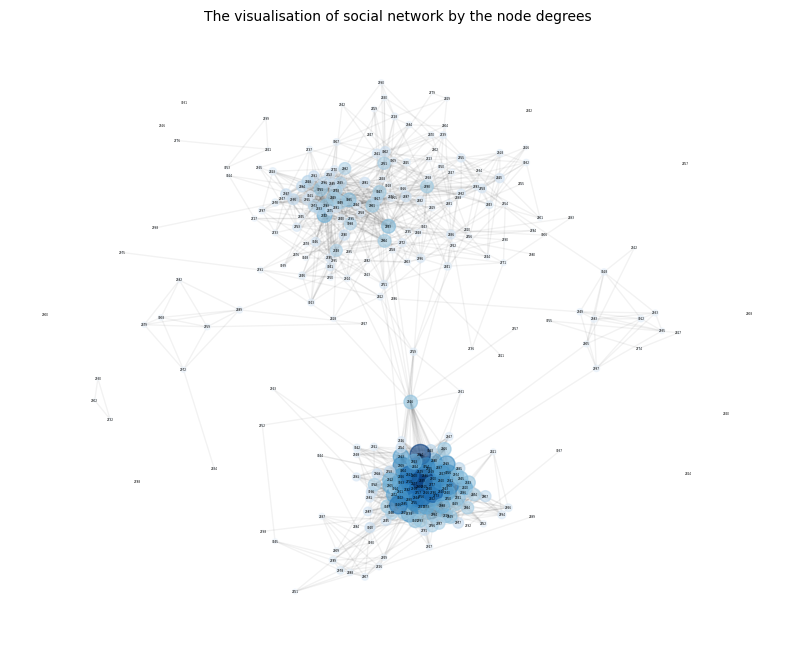

In [184]:
# Node sizes based on degree (higher-degree nodes are larger)
degree = dict(sub_G.degree())
node_sizes = [degree[node] * 3 for node in sub_G.nodes()]
# Node colors based on degree (higher-degree nodes get darker color)
node_colors = [degree[node] for node in sub_G.nodes()]
# Create a layout for positioning (spring layout )
pos = nx.spring_layout(sub_G, seed=42, k=0.25)  # k controls spacing
# Plot the subgraph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(sub_G, pos, node_size=node_sizes, cmap=plt.cm.Blues, node_color=node_colors, alpha=0.6)
nx.draw_networkx_edges(sub_G, pos, alpha=0.05)
nx.draw_networkx_labels(sub_G, pos, font_size=2, font_color="black")
# Title and display
plt.title("The visualisation of social network by the node degrees", fontsize=10)
plt.axis("off")
plt.show()

__The visualization of social network by the edge
 betweenness centrality.__

In [185]:
%%time
# Compute Edge Betweenness Centrality
edge_centrality = nx.edge_betweenness_centrality(sub_G)

CPU times: user 850 ms, sys: 4.09 ms, total: 854 ms
Wall time: 602 ms


In [186]:
# Normalize centrality values for visualization
centrality_values = np.array(list(edge_centrality.values()))
min_c, max_c = min(centrality_values), max(centrality_values)
norm_centrality = (centrality_values - min_c) / (max_c - min_c)  # Normalize between 0 and 1
# Use the updated colormap function
cmap = plt.colormaps.get_cmap("rainbow")
# Generate color values for edges
edge_colors = [cmap(value) for value in norm_centrality]
# Scale edge widths based on centrality
min_width, max_width = 0.1, 2
edge_widths = [min_width + (max_width - min_width) * value for value in norm_centrality]

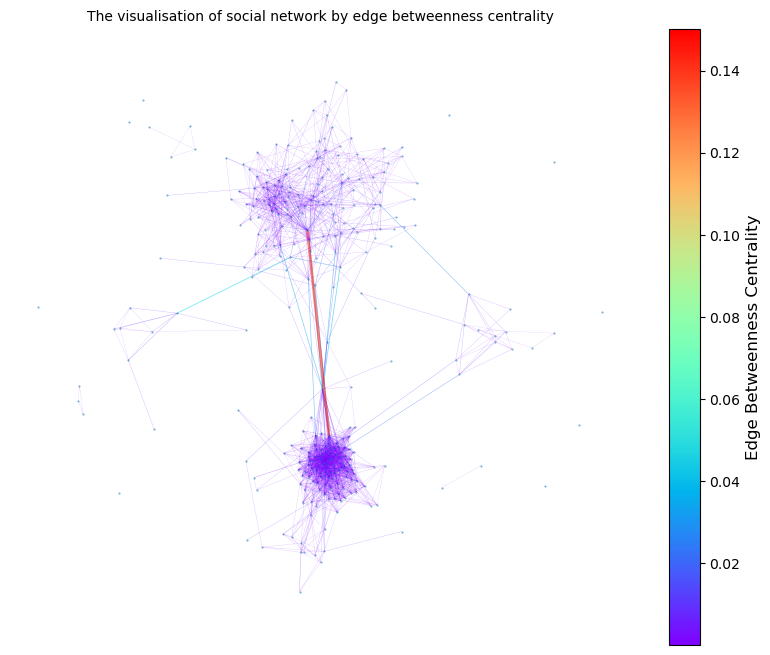

In [187]:
import matplotlib.cm as cm
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
# Compute node positions
pos = nx.spring_layout(sub_G, seed=42, k=0.2)
# Draw nodes
nx.draw_networkx_nodes(sub_G, pos, node_size=0.2, alpha=0.7, ax=ax)
# Draw edges with colormap
edges = list(edge_centrality.keys())
nx.draw_networkx_edges(sub_G, pos, edgelist=edges, edge_color=edge_colors, alpha=0.5, width=edge_widths, ax=ax)
# Add colorbar legend
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_c, vmax=max_c))
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Edge Betweenness Centrality", fontsize=12)
# Title and display
plt.title("The visualisation of social network by edge betweenness centrality", fontsize=10)
plt.axis("off")
plt.show()

### 5.3.2 [Girvan-Newman algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html)

Girvan-Newman algorithm is a method for detecting communities in a graph by progressively removing edges with the highest betweenness centrality.
The algorithm works as follows:
1. Compute the betweenness centrality of all edges in the graph.
2. Identify the edge with the highest betweenness centrality.
3. Remove that edge from the graph.
4. Check if the graph is disconnected (i.e., it has more than one connected component).
5. If the graph is disconnected, the connected components are considered communities.
6. Repeat steps 1-5 until the desired number of communities is detected or no edges remain.
7. Return the detected communities.


In [188]:
# We use Girvan-Newman method in networkx on sub_G as an example
# The output of girvan_newman is a generator of communities, i.e., it produces multiple possible clusterings (partitions of nodes into communities).
# Each result corresponds to a different level of the hierarchy as the Girvan-Newman algorithm progressively removes edges
from networkx.algorithms.community import girvan_newman
comp = girvan_newman(sub_G)

In [189]:
# Get the first two types of results: two types of results of community detection
# Extract first two levels of community partitions
first_comp = next(comp)
second_comp = next(comp)

# Convert to sorted lists for readability
first_communities= [sorted(list(c)) for c in first_comp]
second_communities = [sorted(list(c)) for c in second_comp]

print("The numbers of first communities:", len(first_communities))
print("The numbers of second communities:", len(second_communities))

The numbers of first communities: 15
The numbers of second communities: 16


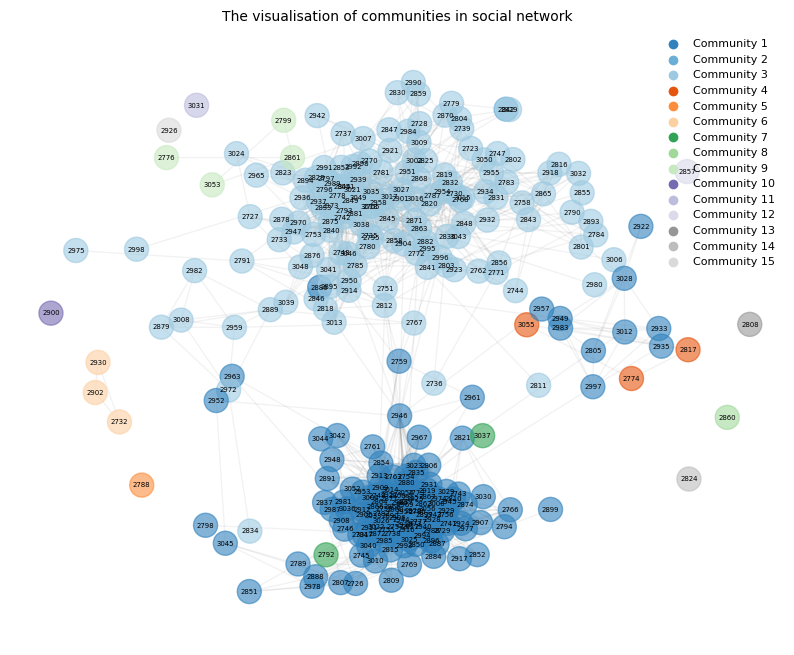

In [190]:
# We use the first communities detected from 300 nodes to visualize the communities.
# Create a color map for the communities
# Generate a color map with distinct colors for each community
cmap = plt.get_cmap("tab20c", len(first_communities))
# Create a color mapping for each community
community_colors = {}
for i, community in enumerate(first_communities):
    for node in community:
        community_colors[node] = cmap(i)
# Create a layout for positioning (spring layout )
pos = nx.spring_layout(sub_G, seed=42, k=0.3)
# Plot the subgraph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(sub_G, pos, node_color=[community_colors[node] for node in sub_G.nodes()], alpha=0.6)
nx.draw_networkx_edges(sub_G, pos, alpha=0.05)
nx.draw_networkx_labels(sub_G, pos, font_size=5, font_color="black")
# Plot the legend
for i, community in enumerate(first_communities):
    plt.scatter([], [], color=cmap(i), label=f"Community {i+1}")
# Add legend to the plot
plt.legend(loc="upper right", fontsize=8, markerscale=1, frameon=False)
# Title and display
plt.title("The visualisation of communities in social network", fontsize=10)
plt.axis("off")
plt.show()

### 5.3.3 [Fluid Communities algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.asyn_fluid.asyn_fluidc.html)

Fluid Communities algorithm is a method for detecting communities in a __connected__ graph based on the concept of fluid dynamics. It works by simulating the flow of "fluid" through the network, where nodes represent containers and edges represent pipes. The algorithm identifies communities by analyzing how the fluid flows and accumulates in different regions of the network. The algorithm is particularly effective for detecting overlapping communities, where nodes can belong to multiple communities simultaneously.

In [191]:
# We apply the Fluid Communities method to a different graph because this method requires a connected graph, but `sub_G` is not connected.
from networkx.algorithms.community import asyn_fluidc

# Create a ladder graph (always connected)
G_e = nx.ladder_graph(200)  # 200 nodes

fluid_communities = asyn_fluidc(G_e, 8)

# Convert to sorted lists for readability
fluid_communities = [sorted(list(c)) for c in fluid_communities]
print("The number of fluid communities:", len(fluid_communities))
print("Communities:", fluid_communities)

The number of fluid communities: 8
Communities: [[138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399], [9, 10, 11, 12, 209, 210, 211, 212], [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284], [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 224, 225, 226, 227, 228, 229, 230, 

In [192]:
# define a function to plot the communities
def plot_communities(G_v, communities):
    # Create a color map for the communities
    cmap = plt.get_cmap("tab20c", len(communities))
    # Create a color mapping for each community
    community_colors = {}
    for i, com in enumerate(communities):
        for node in com:
            community_colors[node] = cmap(i)
    # Create a layout for positioning (spring layout )
    pos = nx.spring_layout(G_v, seed=42, k=0.15)
    # Plot the subgraph
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G_v, pos, node_color=[community_colors[node] for node in G_v.nodes()], alpha=0.6)
    nx.draw_networkx_edges(G_v, pos, alpha=0.05)
    nx.draw_networkx_labels(G_v, pos, font_size=3, font_color="black")
    # Plot the legend
    for i, com in enumerate(communities):
        plt.scatter([], [], color=cmap(i), label=f"Community {i+1}")
    # Add legend to the plot
    plt.legend(loc="upper right", fontsize=8, markerscale=1, frameon=False)
    # Title and display
    plt.title("The visualisation of communities in social network", fontsize=10)
    plt.axis("off")
    plt.show()

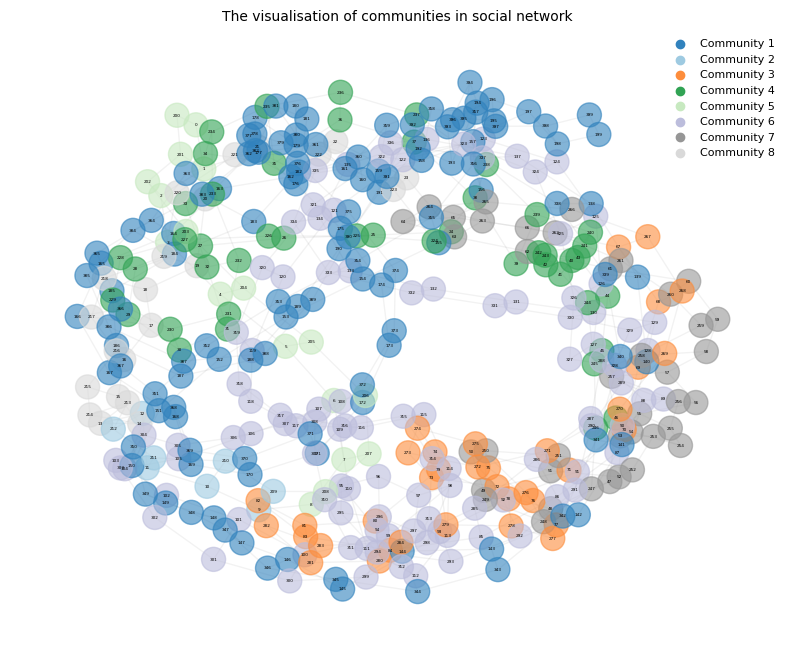

In [193]:
plot_communities(G_e, fluid_communities)

### 5.3.4 [Label Propagation algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html)

Label Propagation algorithm is a method for detecting communities in a graph based on the idea of propagating labels through the network. The algorithm works as follows:
1. Initialize each node with a unique label.
2. For each node, update its label to the most frequent label among its neighbors.
3. Repeat step 2 until convergence (i.e., no labels change).
4. Return the final labels as communities.

5. The algorithm is efficient and can handle large networks, making it suitable for real-world applications.

In [194]:
# We apply the Label Propagation method to sub_G.
from networkx.algorithms.community import label_propagation_communities
# Get the communities
lp_communities = label_propagation_communities(sub_G)
# Convert to sorted lists for readability
lp_communities = [sorted(list(c)) for c in lp_communities]
print("The number of label propagation communities:", len(lp_communities))
print("Communities:", lp_communities)

The number of label propagation communities: 19
Communities: [['2729', '2731', '2738', '2741', '2743', '2745', '2746', '2749', '2750', '2754', '2755', '2756', '2757', '2759', '2761', '2763', '2766', '2773', '2777', '2782', '2786', '2794', '2798', '2800', '2806', '2809', '2810', '2815', '2821', '2827', '2835', '2837', '2839', '2850', '2852', '2854', '2862', '2864', '2866', '2867', '2872', '2873', '2874', '2877', '2880', '2884', '2887', '2890', '2891', '2896', '2897', '2905', '2906', '2907', '2908', '2909', '2910', '2911', '2912', '2913', '2915', '2916', '2917', '2919', '2920', '2924', '2925', '2927', '2928', '2929', '2931', '2940', '2943', '2944', '2945', '2946', '2948', '2952', '2953', '2956', '2957', '2960', '2961', '2963', '2966', '2967', '2969', '2974', '2977', '2981', '2985', '2986', '2987', '2988', '2993', '2994', '3000', '3004', '3010', '3014', '3022', '3023', '3025', '3026', '3029', '3030', '3033', '3036', '3040', '3042', '3044', '3047', '3052', '3054', '3056'], ['2805', '2886',

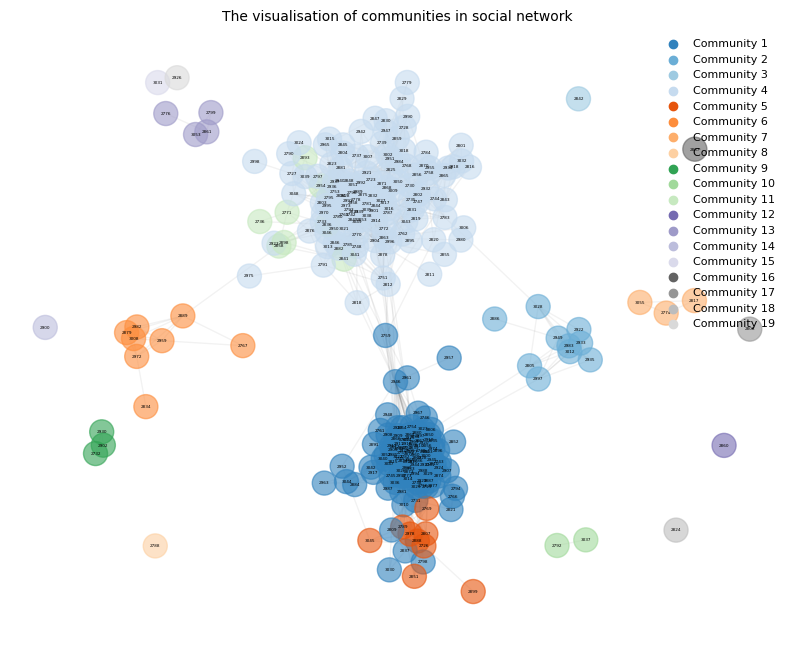

In [195]:
plot_communities(sub_G, lp_communities)

### 5.3.5 [Clique Percolation algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html)

Clique Percolation algorithm is a method for detecting communities in a graph based on the concept of cliques. A clique is a subset of nodes in which every node is connected to every other node. The algorithm works as follows:
1. Identify all cliques of a specified size (k) in the graph.
2. Create a graph where each clique is a node.
3. Connect cliques that share at least one node.
4. Identify connected components in the new graph as communities.
5. Return the detected communities.

In [196]:
# We apply the Clique Percolation method to sub_G.
from networkx.algorithms.community import k_clique_communities
# Get the communities
k = 5 # Size of the cliques
k_communities = k_clique_communities(sub_G, k)
# Convert to sorted lists for readability
k_communities = [sorted(list(c)) for c in k_communities]
print("The number of clique percolation communities:", len(k_communities))
print("Communities:", k_communities)

The number of clique percolation communities: 6
Communities: [['2729', '2731', '2738', '2741', '2743', '2745', '2746', '2749', '2750', '2754', '2755', '2756', '2757', '2761', '2763', '2766', '2773', '2777', '2782', '2786', '2794', '2800', '2806', '2810', '2815', '2821', '2827', '2835', '2839', '2850', '2852', '2854', '2862', '2864', '2866', '2867', '2872', '2873', '2874', '2877', '2880', '2887', '2890', '2891', '2896', '2897', '2905', '2906', '2907', '2908', '2909', '2910', '2911', '2912', '2913', '2915', '2916', '2917', '2919', '2920', '2924', '2925', '2927', '2928', '2929', '2931', '2940', '2943', '2944', '2945', '2946', '2948', '2953', '2956', '2960', '2966', '2967', '2969', '2974', '2977', '2981', '2985', '2986', '2987', '2988', '2993', '2994', '3000', '3004', '3010', '3014', '3022', '3023', '3025', '3026', '3029', '3033', '3036', '3040', '3042', '3047', '3052', '3054', '3056'], ['2933', '2935', '2949', '2983', '2997', '3012', '3028'], ['2742', '2748', '2753', '2765', '2770', '2778

__Exercise: Define a new function to draw the graph visualisation__

### 5.3.6 [Kernighan-Lin algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection.html)

Kernighan-Lin algorithm is a method for detecting communities in a graph based on the concept of graph partitioning. The algorithm works as follows:
1. Initialize two partitions of the graph.
2. Compute the gain for each node in the partitions.
3. Swap nodes between the partitions to maximize the gain.
4. Repeat steps 2-3 until no further improvement can be made.
5. Return the final partitions as communities.

In [197]:
# We apply the Kernighan-Lin method to sub_G.
from networkx.algorithms.community import kernighan_lin_bisection
# Get the communities
kl_communities = kernighan_lin_bisection(sub_G)
# Convert to sorted lists for readability
kl_communities = [sorted(list(c)) for c in kl_communities]
print("The number of Kernighan-Lin communities:", len(kl_communities))
print("Communities:", kl_communities)

The number of Kernighan-Lin communities: 2
Communities: [['2726', '2729', '2731', '2738', '2741', '2743', '2745', '2746', '2749', '2750', '2754', '2755', '2756', '2757', '2759', '2761', '2763', '2766', '2767', '2769', '2773', '2774', '2776', '2777', '2782', '2786', '2789', '2792', '2794', '2798', '2799', '2800', '2805', '2806', '2807', '2809', '2810', '2815', '2817', '2821', '2827', '2835', '2837', '2839', '2850', '2851', '2852', '2854', '2861', '2862', '2864', '2866', '2867', '2872', '2873', '2874', '2877', '2879', '2880', '2884', '2886', '2887', '2888', '2889', '2890', '2891', '2896', '2897', '2899', '2905', '2906', '2907', '2908', '2909', '2910', '2911', '2912', '2913', '2915', '2916', '2917', '2919', '2920', '2922', '2924', '2925', '2927', '2928', '2929', '2931', '2933', '2935', '2940', '2943', '2944', '2945', '2946', '2948', '2949', '2952', '2953', '2956', '2957', '2959', '2960', '2961', '2963', '2966', '2967', '2969', '2972', '2974', '2977', '2978', '2981', '2982', '2983', '2985'

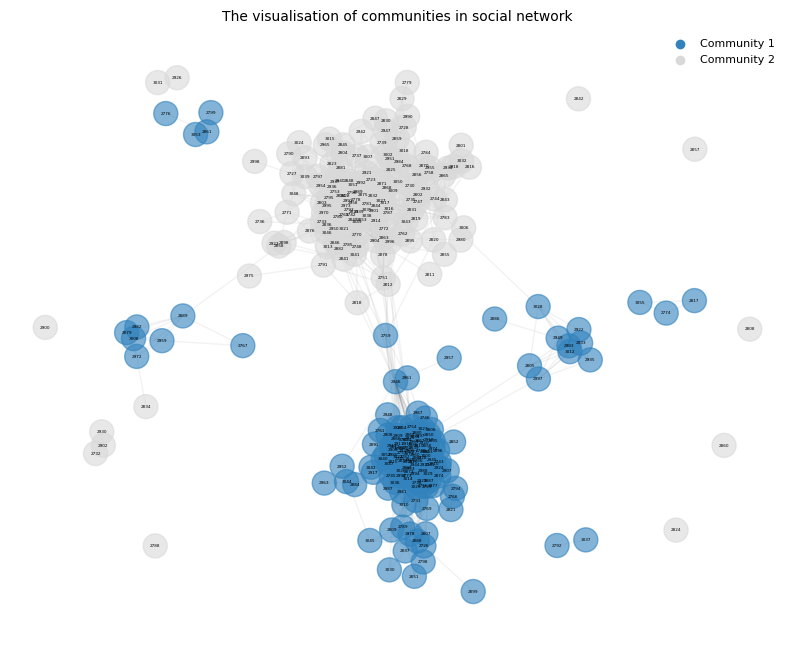

In [198]:
# Plot the communities
plot_communities(sub_G, kl_communities)

## 5.4 Link Prediction

- Link prediction aims to predict missing or future connections between nodes in a graph.

- The idea behind link prediction is that nodes with similar properties or shared connections are more likely to form a link in the future.

- It is widely used in social networks, biological networks, recommendation systems, and fraud detection.

__Generate all non-edges: A non-edge is a pair of nodes that are not connected.__


In [199]:
# Generate all non-edges (pairs of nodes without an edge between them)
non_edges = list(nx.non_edges(sub_G))
print(f"Number of non-edges: {len(non_edges)}")

Number of non-edges: 42166


### 5.4.1 Jaccard Coefficient

The Jaccard Coefficient measures the similarity between two nodes based on their common neighbors.
The Jaccard Coefficient $J(u, v)$ between two nodes $u$ and $v$ is defined as:

$J(u, v) = \frac{|N(u) \cap N(v)|}{|N(u) \cup N(v)|}$

Where:

- $ N(u) $ is the set of neighbors of node $ u $,
- $ N(v) $ is the set of neighbors of node $ v $,
- $ |N(u) \cap N(v)| $ is the size of the intersection of the neighbor sets of $ u $ and $ v $,
- $ |N(u) \cup N(v)| $ is the size of the union of the neighbor sets of $ u $ and $ v $.

- Example: J(A, D)
```
A - B - C
    |
E - D - F
```
- $N(A) = \set{B}$
- $N(D) = \set{B, E, F}$
- $|N(A) \cap N(D)|$ = 1
- $|N(A) \cup N(D)|$ = 3
- $J(A, D) = 1/3$




__Calculating JC using nx__

In [5]:
# Create G_example
G_example = nx.Graph()
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('D', 'F')]
G_example.add_edges_from(edges)
# Calculate Jaccard coefficient between node 'A' and node 'D'
jaccard_coefficient = list(nx.jaccard_coefficient(G_example, [('A', 'D')]))
print(jaccard_coefficient)

[('A', 'D', 0.3333333333333333)]


__Link prediction on social network__

In [200]:
# Jaccard Coefficient for non-edges
jaccard_scores = list(nx.jaccard_coefficient(sub_G, non_edges))

In [201]:
# Sort the Jaccard scores in descending order (high scores indicate higher likelihood of a link)
top_predictions = sorted(jaccard_scores, key=lambda x: x[2], reverse=True)[:15] # we can also use pandas to sort the values to a df.
# Display the top 15 predicted links
print("Top 15 Predictions (Jaccard Coefficient):")
for u, v, score in top_predictions:
    print(f"Predicted link: ({u}, {v}) with JC: {score:.2f}")

Top 15 Predictions (Jaccard Coefficient):
Predicted link: (2980, 3006) with JC: 1.00
Predicted link: (2736, 2893) with JC: 1.00
Predicted link: (2811, 2855) with JC: 1.00
Predicted link: (2972, 2982) with JC: 0.80
Predicted link: (3045, 2851) with JC: 0.60
Predicted link: (2801, 2816) with JC: 0.60
Predicted link: (2880, 2777) with JC: 0.59
Predicted link: (2977, 2929) with JC: 0.58
Predicted link: (2750, 2919) with JC: 0.57
Predicted link: (2816, 3032) with JC: 0.57
Predicted link: (2750, 2777) with JC: 0.57
Predicted link: (2919, 2755) with JC: 0.56
Predicted link: (2997, 3028) with JC: 0.56
Predicted link: (2877, 2927) with JC: 0.55
Predicted link: (2800, 2920) with JC: 0.55


__Visualise the top 15 predicted links by Jaccard Coefficient, you can use other solution to plot all edges by Jaccard Coefficient.__


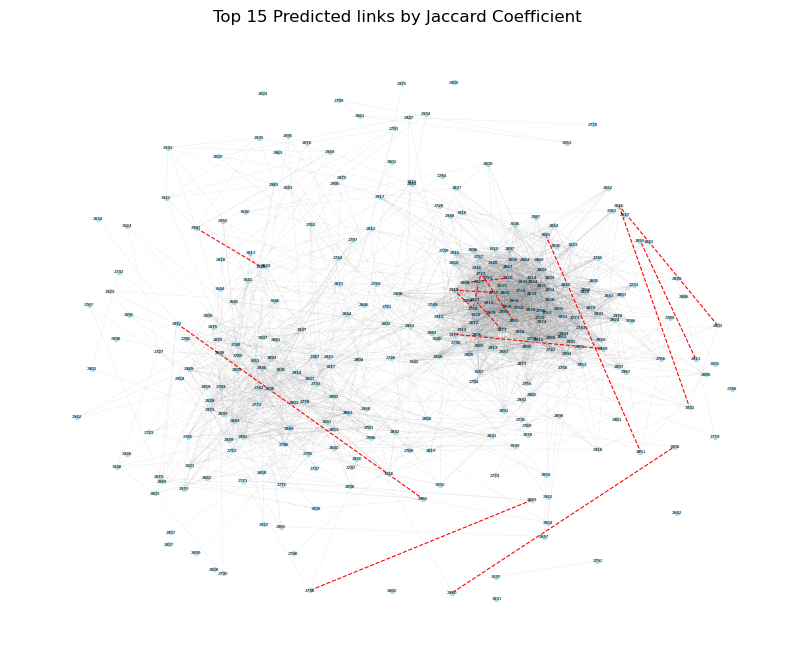

In [202]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(sub_G, k=0.5)
nx.draw_networkx_nodes(sub_G, pos, node_size=8, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(sub_G, pos, edge_color='gray', alpha=0.5, width=0.1)
nx.draw_networkx_labels(sub_G, pos, font_size=3, font_color="black")
# Highlight the top 15 edges with the highest Jaccard scores
highlighted_edges = [(u, v) for u, v, score in top_predictions]
# Draw the highlighted edges with a different color (e.g., red) and thickness
nx.draw_networkx_edges(sub_G, pos, edgelist=highlighted_edges, edge_color='r', width=0.8, style='dashed')
plt.title("Top 15 Predicted links by Jaccard Coefficient")
plt.axis("off")
plt.show()

### 5.4.2 Common neighbours


In link prediction, common neighbors is a simple and effective method used to predict the likelihood of an edge (link) forming between two nodes in a network. It is based on the idea that two nodes are more likely to be connected if they share many common neighbors.

In [203]:
# Step 1: Calculate common neighbors and assign scores (e.g., the frequency of common neighbours)
predictions = []
for node_a in sub_G.nodes():
    for node_b in sub_G.nodes():
        if node_a != node_b and not sub_G.has_edge(node_a, node_b):
            # Calculate common neighbors between node_a and node_b
            common_neighbors_list = list(nx.common_neighbors(sub_G, node_a, node_b))
            common_neighbors_score = len(common_neighbors_list)

            if common_neighbors_score > 0:  # Only consider pairs with common neighbors
                predictions.append((node_a, node_b, common_neighbors_score))
# Step 2: Sort predictions based on the common neighbors score in descending order
predictions.sort(key=lambda x: x[2], reverse=True)
# Step 3: Output the top predictions (e.g., top 15 most likely links)
top_predictions = predictions[:15]
print("Top 10 link predictions based on common neighbors:")
for pred in top_predictions:
    print(f"Prediction: ({pred[0]}, {pred[1]}) with score: {pred[2]}")

Top 10 link predictions based on common neighbors:
Prediction: (2877, 2927) with score: 42
Prediction: (2927, 2877) with score: 42
Prediction: (2944, 2986) with score: 41
Prediction: (2986, 2944) with score: 41
Prediction: (2925, 2754) with score: 38
Prediction: (2754, 2925) with score: 38
Prediction: (2928, 2877) with score: 37
Prediction: (2877, 2928) with score: 37
Prediction: (2877, 2777) with score: 37
Prediction: (2750, 2777) with score: 37
Prediction: (2777, 2877) with score: 37
Prediction: (2777, 2750) with score: 37
Prediction: (2909, 2966) with score: 36
Prediction: (2960, 3054) with score: 36
Prediction: (2750, 2919) with score: 36


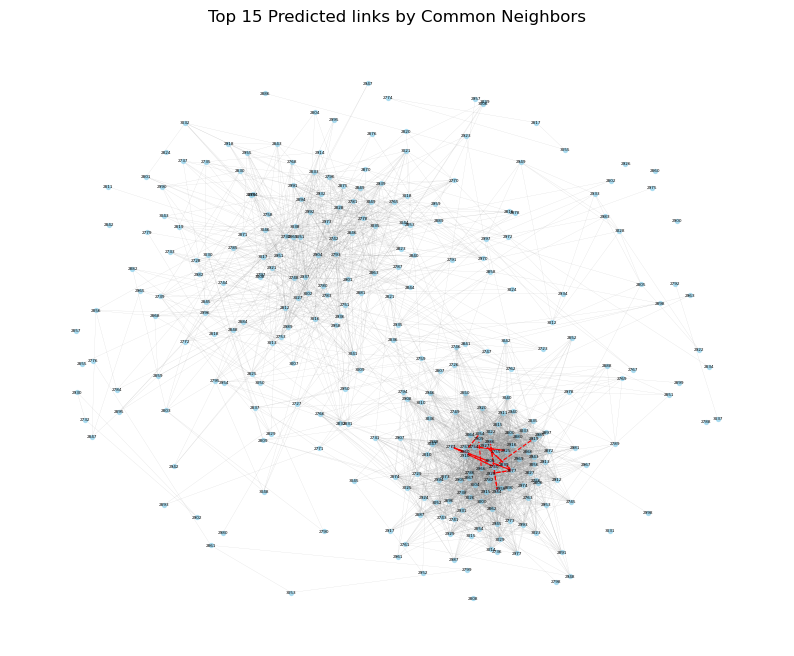

In [204]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(sub_G, k=0.5)
nx.draw_networkx_nodes(sub_G, pos, node_size=8, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(sub_G, pos, edge_color='gray', alpha=0.5, width=0.1)
nx.draw_networkx_labels(sub_G, pos, font_size=3, font_color="black")
# Highlight the top 15 edges with the highest Jaccard scores
highlighted_edges = [(u, v) for u, v, score in top_predictions]
# Draw the highlighted edges with a different color (e.g., red) and thickness
nx.draw_networkx_edges(sub_G, pos, edgelist=highlighted_edges, edge_color='r', width=0.8, style='dashed')
plt.title("Top 15 Predicted links by Common Neighbors")
plt.axis("off")
plt.show()

## 5.5 Influence propagation

 Influence Propagation is a model used to simulate how information, behaviors, or influence spread through a network over time. It focuses on diffusion processes in networks and is often used in the context of social influence, viral marketing, or epidemic spread.

### 5.5.1 [Independent Cascade Model (IC Model)](https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/IndependentCascades.html#id2)

[NDlib](https://ndlib.readthedocs.io/en/latest/overview.html) is a Python library designed to describe, simulate and study diffusion processes on complex networks.

In [66]:
# ! pip install ndlib

In [4]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep #The IC model is included in epidemics in NDLib as a class and is a widely used model for simulating the propagation or spread of viruses in epidemics.

In [7]:
# Select Independent Cascade Model on Sub_G
ic_model = ep.IndependentCascadesModel(sub_G)

# Set the model configuration
config = mc.Configuration() # Create configuration container
config.add_model_parameter('fraction_infected', 0.01)  # the fraction of initially infected nodes

# Set the edge thresholds (if needed, otherwise this may be omitted in IC model)
threshold = 0.1 # Default propagation probability for all edges
for e in sub_G.edges():
    config.add_edge_configuration("threshold", e, threshold)

# Apply configuration to model
ic_model.set_initial_status(config)

# Run the simulation for specified number of iterations
iterations = ic_model.iteration_bunch(100)

# Calculate the fraction of infected nodes over time
time_steps = list(range(100))
fraction_infected = [it['node_count'][1] / sub_G.number_of_nodes() for it in iterations]

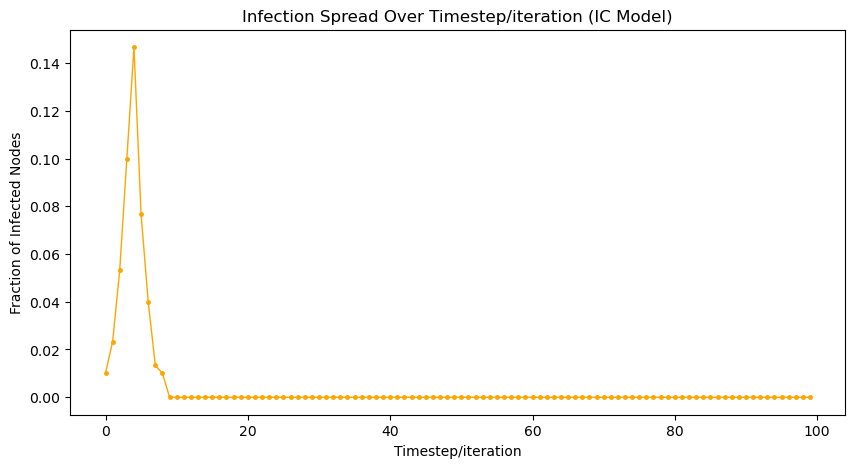

In [27]:
# Infection Curve Visualization
plt.figure(figsize=(10, 5))
plt.plot(time_steps, fraction_infected, marker='o', linestyle='-', color='orange', markersize=2.5, linewidth=1)
plt.title("Infection Spread Over Timestep/iteration (IC Model)")
plt.xlabel("Timestep/iteration")
plt.ylabel("Fraction of Infected Nodes")
plt.show()

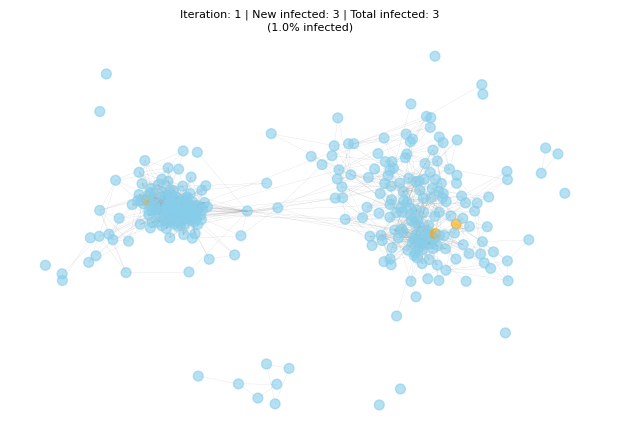

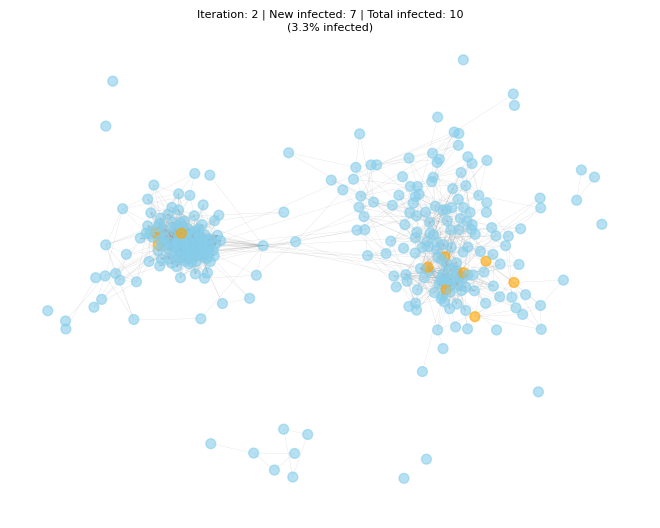

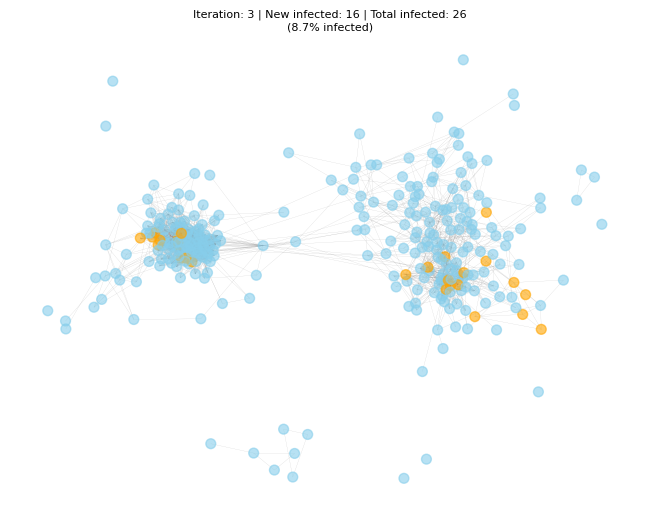

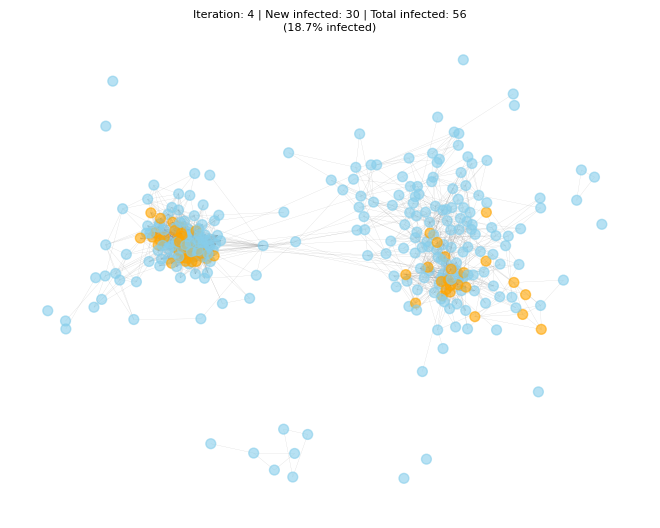

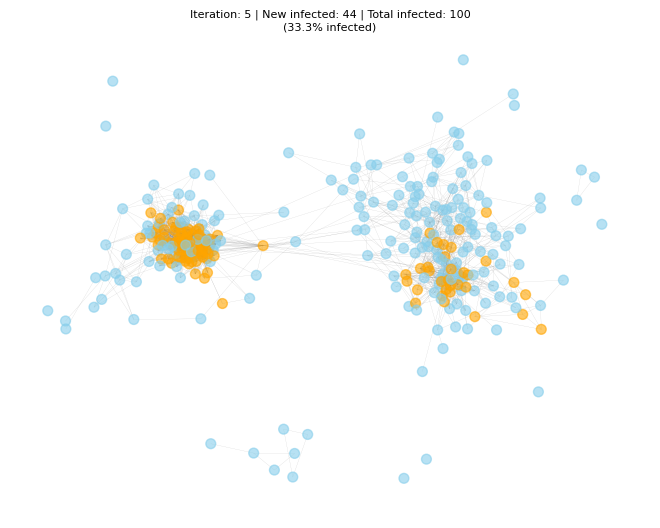

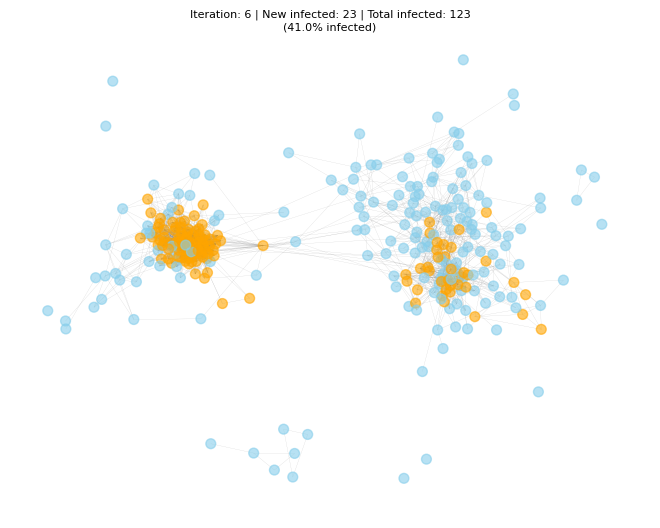

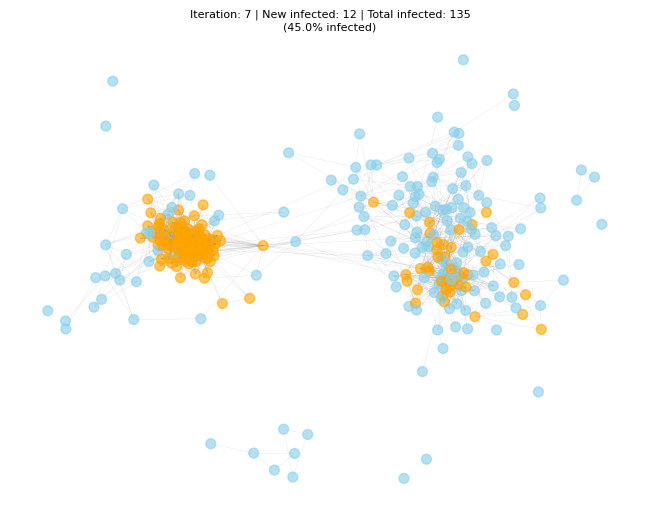

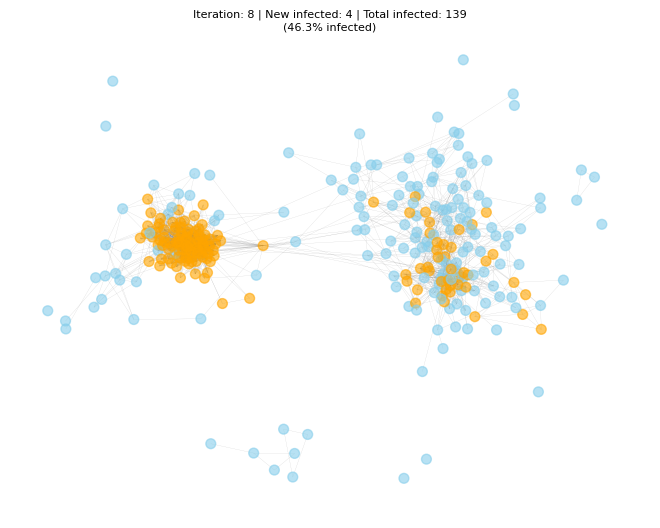

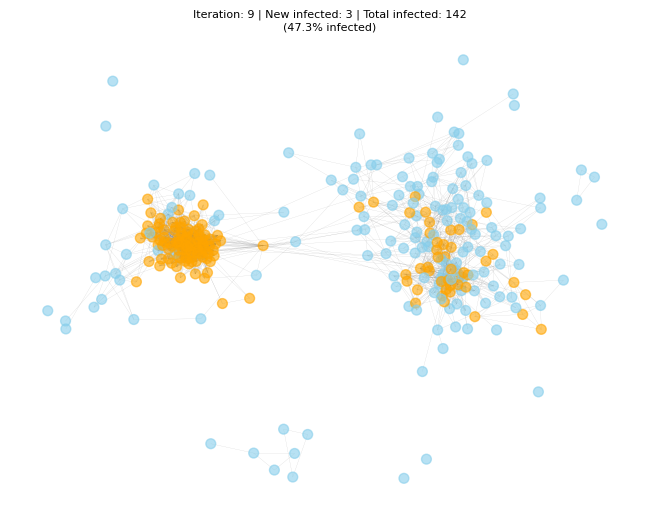

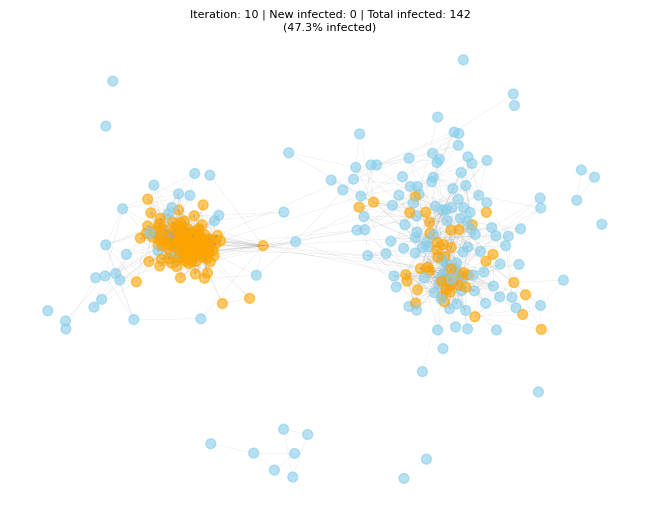

In [28]:
# Plot setup
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(sub_G, k=0.2)  # Preserve layout across iterations
cumulative_infected = set()

# Limit to first 10 iterations
for i, iteration in enumerate(iterations[:10]):
    plt.clf()  # Reset canvas

    # Update infections
    current_status = iteration['status']
    new_infected = [n for n, s in current_status.items() if s == 1]
    cumulative_infected.update(new_infected)

    # Create node colors
    node_colors = ['orange' if n in cumulative_infected else 'skyblue' for n in sub_G.nodes()]

    # Plot graph
    nx.draw(sub_G, pos, node_color=node_colors, with_labels=False,
            node_size=50, edge_color='gray', width=0.1, alpha=0.6)

    # Add annotation
    plt.title(f"Iteration: {i+1} | "
             f"New infected: {len(new_infected)} | Total infected: {len(cumulative_infected)}\n"
             f"({len(cumulative_infected)/sub_G.number_of_nodes():.1%} infected)", fontsize=8)

    plt.axis('off')
    plt.pause(1)  # Second pause between iterations

plt.show()

### 5.5.2 [Susceptible-Infected-Removed (SIR) model](https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIR.html)

The SIR model  used in epidemiology to describe how infectious diseases spread through a population.

It divides the population into three parts:

- Susceptible (S): Individuals who are not yet infected but can contract the disease.

- Infected (I): Individuals who are currently infected and can spread the disease to susceptible individuals.

- Removed (R): Individuals who have either recovered (and gained immunity) or died, meaning they no longer participate in disease transmission.

Key Parameters:

- $\beta$ (beta): Infection probability

- $\gamma$ (gamma): Recovery probability

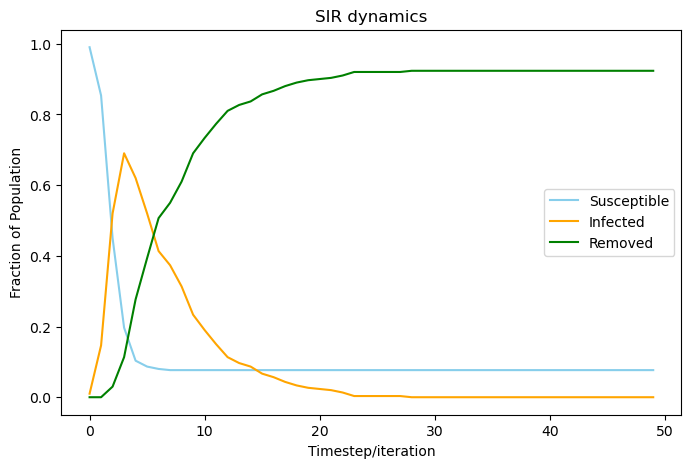

In [37]:
# Set SIR Model
sir_model = ep.SIRModel(sub_G)

# 2. Configure parameters
config = mc.Configuration()
config.add_model_parameter('beta', 0.4)  # Infection probability
config.add_model_parameter('gamma', 0.2)  # Recovery probability

# Option 1: Initial infected nodes (fraction)
config.add_model_parameter("fraction_infected", 0.01)

# Option 2: Manually set initial infected nodes
# initial_infected = [1, 5, 10]  # Specify initial infected nodes with index
# config.add_model_initial_configuration("Infected", initial_infected)

# Model configuration set
sir_model.set_initial_status(config)

# Run simulation
iterations = sir_model.iteration_bunch(50)

# Process results
susceptible = []
infected = []
removed = []

for iteration in iterations:
    susceptible.append(iteration['node_count'][0]/sub_G.number_of_nodes())
    infected.append(iteration['node_count'][1]/sub_G.number_of_nodes())
    removed.append(iteration['node_count'][2]/sub_G.number_of_nodes())

# Plot curve of SIR
plt.figure(figsize=(8, 5))
plt.plot(susceptible, label='Susceptible', color='skyblue')
plt.plot(infected, label='Infected', color='orange')
plt.plot(removed, label='Removed', color='green')
plt.title("SIR dynamics")
plt.xlabel("Timestep/iteration")
plt.ylabel("Fraction of Population")
plt.legend()
plt.show()

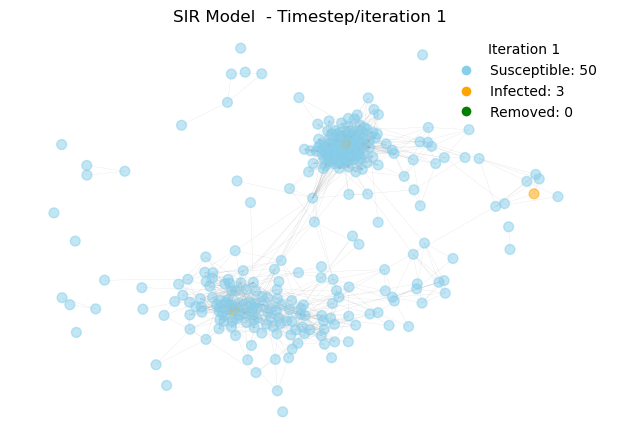

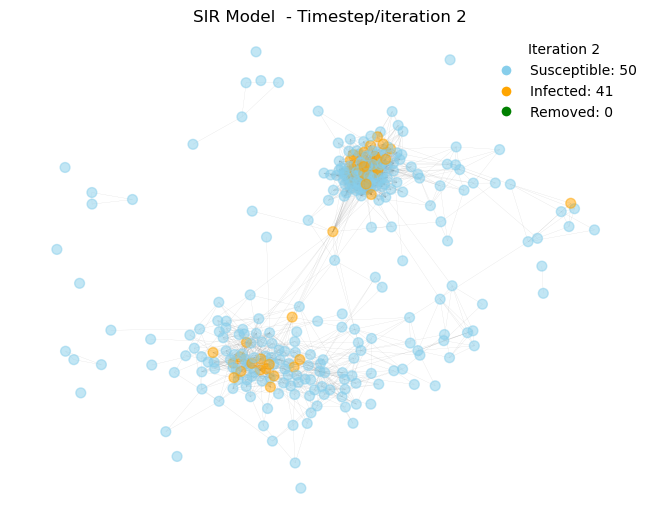

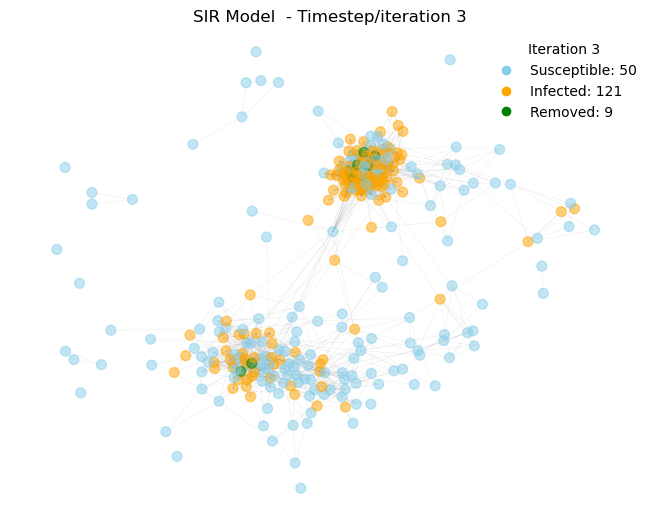

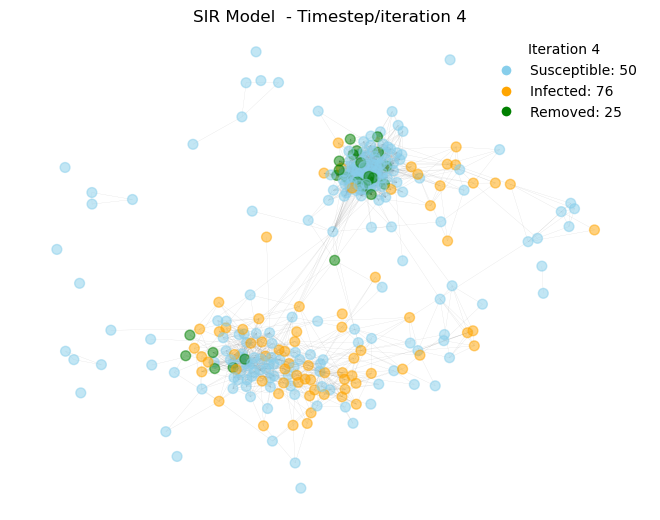

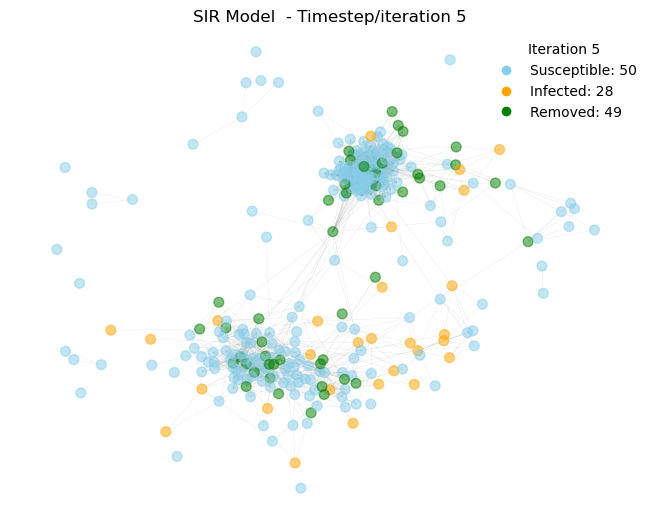

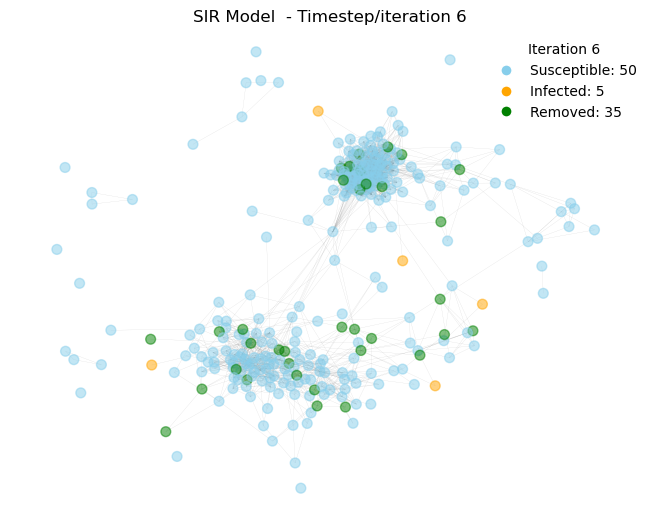

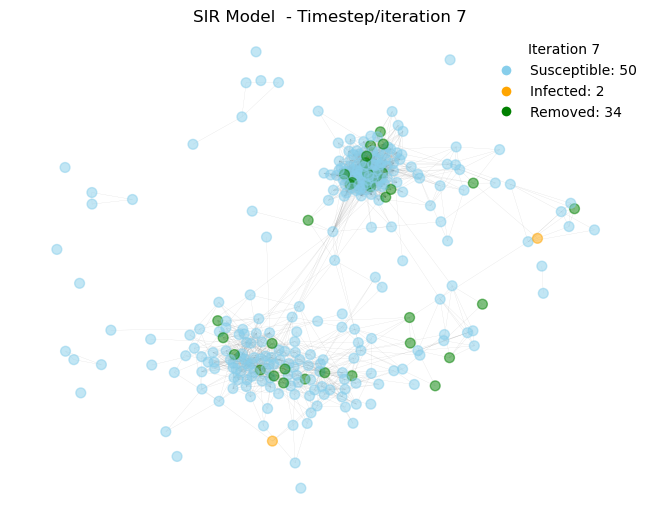

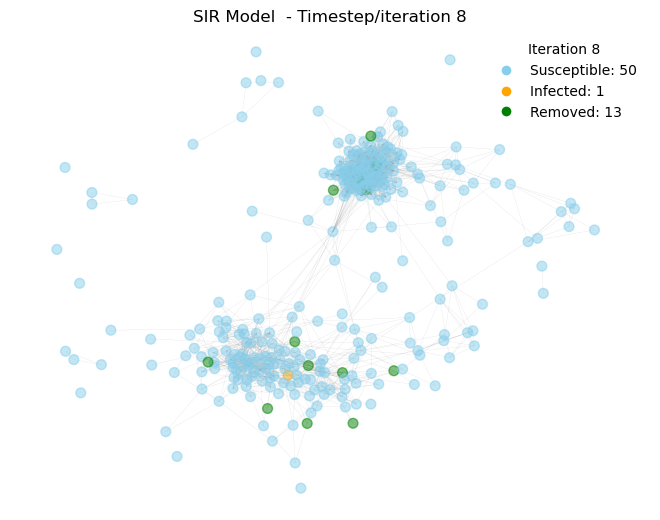

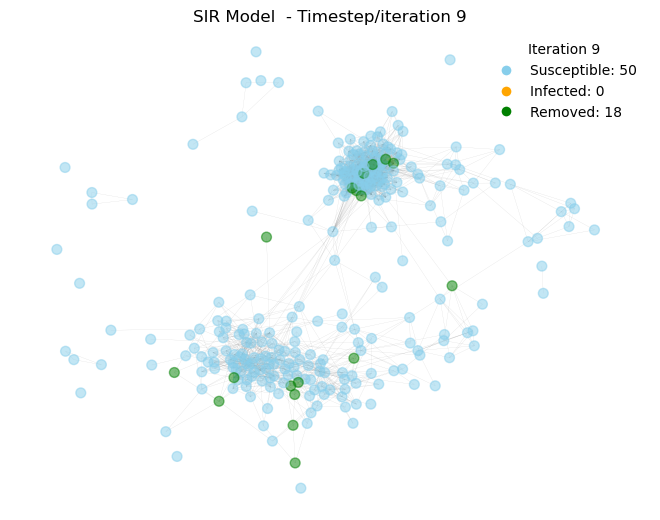

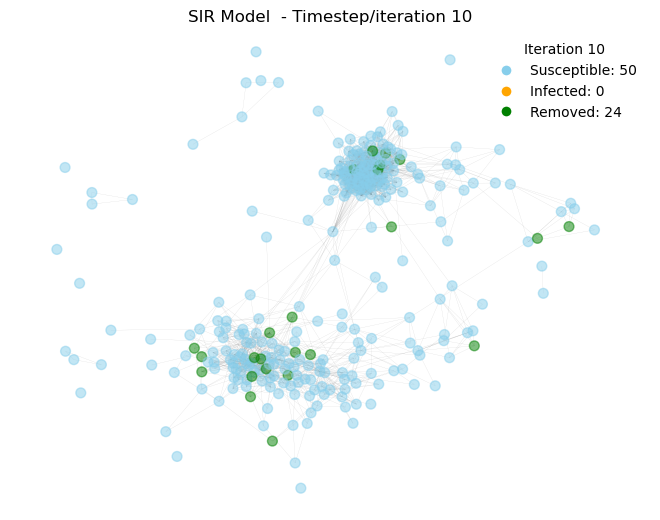

In [48]:
pos = nx.spring_layout(sub_G, k=0.2)  # Calculate once for consistent visualization
# Create figure
plt.figure(figsize=(6, 4))

for i, iteration in enumerate(iterations[:10]):
    plt.clf()  # Clear previous frame

    # Get current node states
    statuses = iteration['status']
    infected = [n for n, s in statuses.items() if s == 1]
    removed = [n for n, s in statuses.items() if s == 2]

    # Create cmap
    node_colors = []
    for node in sub_G.nodes():
        if node in infected:
            node_colors.append('orange')    # Currently infected
        elif node in removed:
            node_colors.append('green')  # Removed/recovered
        else:
            node_colors.append('skyblue')  # Susceptible

    # Plot graph
    nx.draw(sub_G, pos, node_color=node_colors, with_labels=False,
            node_size=50, edge_color='grey', width=0.1, alpha=0.5)

    from matplotlib.lines import Line2D
    legend_elements = [
            Line2D([0], [0], marker='o', color='w', label=f'Susceptible: {len(susceptible)}',
               markerfacecolor='skyblue', markersize=8, linestyle='None'),
        Line2D([0], [0], marker='o', color='w', label=f'Infected: {len(infected)}',
               markerfacecolor='orange', markersize=8, linestyle='None'),
        Line2D([0], [0], marker='o', color='w', label=f'Removed: {len(removed)}',
               markerfacecolor='green', markersize=8, linestyle='None')
    ]

    plt.legend(handles=legend_elements, loc='upper right',
           title=f"Iteration {i+1}", frameon=False)

    plt.title(f"SIR Model - Timestep/iteration {i+1}")
    plt.axis('off')
    plt.pause(1)  # 1 second pause between frames

plt.show()